In [1]:
from bs4 import BeautifulSoup
import pandas as pd

In [15]:
from urllib.request import urlopen

url = 'https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20210327'
page = urlopen(url)
soup = BeautifulSoup(page, 'html.parser')
soup

71661377%"><img alt="" height="14" src="https://ssl.pstatic.net/imgmovie/2007/img/common/point_type_2_bg_on.gif" width="79"/></div></div></td>
<td class="point">7.82</td>
<td class="ac"><a class="txt_link" href="/movie/point/af/list.nhn?st=mcode&amp;sword=187310">평점주기</a></td>
<!----------------------------------------->
<td class="ac"><img alt="up" class="arrow" height="10" src="https://ssl.pstatic.net/imgmovie/2007/img/common/icon_up_1.gif" width="7"/></td>
<td class="range ac">2</td>
</tr>
<tr>
<td class="ac"><img alt="47" height="13" src="https://ssl.pstatic.net/imgmovie/2007/img/common/bullet_r_g47.gif" width="14"/></td>
<td class="title">
<div class="tit5">
<a href="/movie/bi/mi/basic.nhn?code=158910" title="예수는 역사다">예수는 역사다</a>
</div>
</td>
<!-- 평점순일 때 평점 추가하기  -->
<td><div class="point_type_2"><div class="mask" style="width:78.00000190734863%"><img alt="" height="14" src="https://ssl.pstatic.net/imgmovie/2007/img/common/point_type_2_bg_on.gif" width="79"/></div></div></td>
<td 

In [13]:
soup.find_all('div', 'tit3')

[<div class="tit3">
 <a href="/movie/bi/mi/basic.nhn?code=191637" title="고질라 VS. 콩">고질라 VS. 콩</a>
 </div>, <div class="tit3">
 <a href="/movie/bi/mi/basic.nhn?code=187310" title="미나리">미나리</a>
 </div>, <div class="tit3">
 <a href="/movie/bi/mi/basic.nhn?code=196051" title="극장판 귀멸의 칼날: 무한열차편">극장판 귀멸의 칼날: 무한열차편</a>
 </div>, <div class="tit3">
 <a href="/movie/bi/mi/basic.nhn?code=202526" title="최면">최면</a>
 </div>, <div class="tit3">
 <a href="/movie/bi/mi/basic.nhn?code=203288" title="잭 스나이더의 저스티스 리그">잭 스나이더의 저스티스 리그</a>
 </div>, <div class="tit3">
 <a href="/movie/bi/mi/basic.nhn?code=184518" title="라야와 마지막 드래곤">라야와 마지막 드래곤</a>
 </div>, <div class="tit3">
 <a href="/movie/bi/mi/basic.nhn?code=184517" title="소울">소울</a>
 </div>, <div class="tit3">
 <a href="/movie/bi/mi/basic.nhn?code=189075" title="자산어보">자산어보</a>
 </div>, <div class="tit3">
 <a href="/movie/bi/mi/basic.nhn?code=193800" title="모리타니안">모리타니안</a>
 </div>, <div class="tit3">
 <a href="/movie/bi/mi/basic.nhn?code=196052" title=

In [16]:
soup.find_all('div','tit5')[0].a.string

'극장판 바이올렛 에버가든'

In [18]:
soup.find_all('td','point')[0].string

'9.48'

In [19]:
date = pd.date_range('2021-01-01', periods=100, freq='D')
date

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10', '2021-01-11', '2021-01-12',
               '2021-01-13', '2021-01-14', '2021-01-15', '2021-01-16',
               '2021-01-17', '2021-01-18', '2021-01-19', '2021-01-20',
               '2021-01-21', '2021-01-22', '2021-01-23', '2021-01-24',
               '2021-01-25', '2021-01-26', '2021-01-27', '2021-01-28',
               '2021-01-29', '2021-01-30', '2021-01-31', '2021-02-01',
               '2021-02-02', '2021-02-03', '2021-02-04', '2021-02-05',
               '2021-02-06', '2021-02-07', '2021-02-08', '2021-02-09',
               '2021-02-10', '2021-02-11', '2021-02-12', '2021-02-13',
               '2021-02-14', '2021-02-15', '2021-02-16', '2021-02-17',
               '2021-02-18', '2021-02-19', '2021-02-20', '2021-02-21',
               '2021-02-22', '2021-02-23', '2021-02-24', '2021-02-25',
      

In [21]:
import urllib
from tqdm import tqdm

movieDate = []
movieName = []
moviePoint = []

for today in tqdm(date):
    html = 'https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date={date}'
    response = urlopen(html.format(date=urllib.parse.quote(today.strftime('%Y%m%d'))))
    soup = BeautifulSoup(response, 'html.parser')
    end = len(soup.find_all('td', 'point'))

    movieDate.extend([today for n in range(0, end)])
    movieName.extend([soup.find_all('div','tit5')[n].a.string for n in range(0, end)])
    moviePoint.extend([soup.find_all('td','point')[n].string for n in range(0, end)])

100%|██████████| 100/100 [01:01<00:00,  1.64it/s]


In [22]:
movie = pd.DataFrame({'date':movieDate, 'name':movieName, 'point':moviePoint})
movie.head()

,date,name,point
0,2021-01-01,가나의 혼인잔치: 언약,9.59
1,2021-01-01,언플랜드,9.52
2,2021-01-01,극장판 바이올렛 에버가든,9.49
3,2021-01-01,부활: 그 증거,9.40
4,2021-01-01,소년시절의 너,9.39


In [27]:
import numpy as np

movie['point'] = pd.to_numeric(movie['point'])

In [49]:
moviUnique = pd.pivot_table(movie, index=['name'], aggfunc=np.sum)
movieBest = moviUnique.sort_values(by='point', ascending=False)
movieBest.head(50)

,point
name,
극장판 바이올렛 에버가든,949.98
부활: 그 증거,936.39
타오르는 여인의 초상,905.85
러브레터,893.76
러브 액츄얼리,893.02
화양연화,877.12
너의 췌장을 먹고 싶어,846.33
찬실이는 복도 많지,838.02
너의 이름은.,817.40


In [57]:
tmp = movie.query('name == ["소울"]')
tmp

,date,name,point
915,2021-01-20,소울,9.53
966,2021-01-21,소울,9.51
1016,2021-01-22,소울,9.51
1065,2021-01-23,소울,9.48
1115,2021-01-24,소울,9.46
...,...,...,...
4550,2021-04-06,소울,9.30
4600,2021-04-07,소울,9.30
4650,2021-04-08,소울,9.30
4700,2021-04-09,소울,9.30


In [62]:
import matplotlib.pyplot as plt
%matplotlib inline



<Figure size 864x7200 with 0 Axes>

<Figure size 864x7200 with 0 Axes>

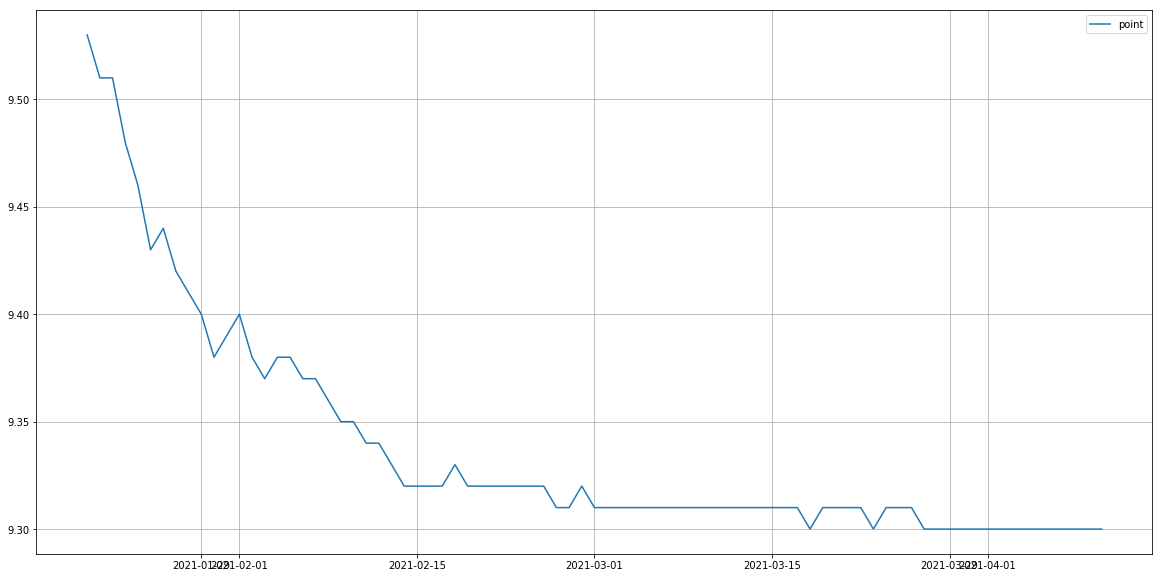

In [72]:
plt.figure(figsize=(20,10))
plt.plot(tmp['date'], tmp['point'])
plt.legend(loc='best')
plt.grid()
plt.show()

In [78]:
moviePivot = pd.pivot_table(movie, index=['date'], columns=['name'], values=['point'])
moviePivot.head()

point                                                             \
name       120BPM 1917   800 가나의 혼인잔치: 언약 고질라 VS. 콩 국가부도의 날   굿바이 귀여운 여인  그녀   
date                                                                           
2021-01-01    NaN  NaN  3.60         9.59       NaN     NaN  9.04    8.7 NaN   
2021-01-02    NaN  NaN  3.60         9.56       NaN     NaN  9.04    8.7 NaN   
2021-01-03    NaN  NaN  3.60         9.54       NaN     NaN  9.04    8.7 NaN   
2021-01-04    NaN  NaN  3.61         9.51       NaN     NaN  9.04    8.7 NaN   
2021-01-05    NaN  NaN  3.62         9.52       NaN     NaN  9.04    NaN NaN   

                    ...                                                    \
name       그레이트 뷰티  ...   피아노 피아니스트의 전설 하나와 앨리스 해리 포터와 불의 잔 해리가 샐리를 만났을 때   
date                ...                                                     
2021-01-01     NaN  ...  8.66       NaN    8.11         NaN          8.89   
2021-01-02     NaN  ...  8.66       NaN    8.11         NaN          8.89   
2021-01-03     NaN  ...  8.66       NaN    8.11         NaN          8.88   
2021-01-04     NaN  ...   NaN       NaN    8.11         NaN          8.88   
2021-01-05     NaN  ...   NaN       NaN     NaN         NaN          8.88   

                                       
name       해피 투게더 허트 로커 현기증  협상  화양연화  
date                                   
2021-01-01    NaN   NaN NaN NaN  8.80  
2021-01-02    NaN   NaN NaN NaN  8.79  
2021-01-03    NaN   NaN NaN NaN  8.75  
2021-01-04    NaN   NaN NaN NaN  8.76  
2021-01-05    NaN   NaN NaN NaN  8.76  

[5 rows x 167 columns]

In [79]:
moviePivot.columns = moviePivot.columns.droplevel()
moviePivot.head()

name,120BPM,1917,800,가나의 혼인잔치: 언약,고질라 VS. 콩,국가부도의 날,굿바이,귀여운 여인,그녀,그레이트 뷰티,...,피아노,피아니스트의 전설,하나와 앨리스,해리 포터와 불의 잔,해리가 샐리를 만났을 때,해피 투게더,허트 로커,현기증,협상,화양연화
date,,,,,,,,,,,,,,,,,,,,,
2021-01-01,NaN,NaN,3.60,9.59,NaN,NaN,9.04,8.7,NaN,NaN,...,8.66,NaN,8.11,NaN,8.89,NaN,NaN,NaN,NaN,8.80
2021-01-02,NaN,NaN,3.60,9.56,NaN,NaN,9.04,8.7,NaN,NaN,...,8.66,NaN,8.11,NaN,8.89,NaN,NaN,NaN,NaN,8.79
2021-01-03,NaN,NaN,3.60,9.54,NaN,NaN,9.04,8.7,NaN,NaN,...,8.66,NaN,8.11,NaN,8.88,NaN,NaN,NaN,NaN,8.75
2021-01-04,NaN,NaN,3.61,9.51,NaN,NaN,9.04,8.7,NaN,NaN,...,NaN,NaN,8.11,NaN,8.88,NaN,NaN,NaN,NaN,8.76
2021-01-05,NaN,NaN,3.62,9.52,NaN,NaN,9.04,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,8.88,NaN,NaN,NaN,NaN,8.76


In [80]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    fontName = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=fontName)
else:
    print('Unknown system')

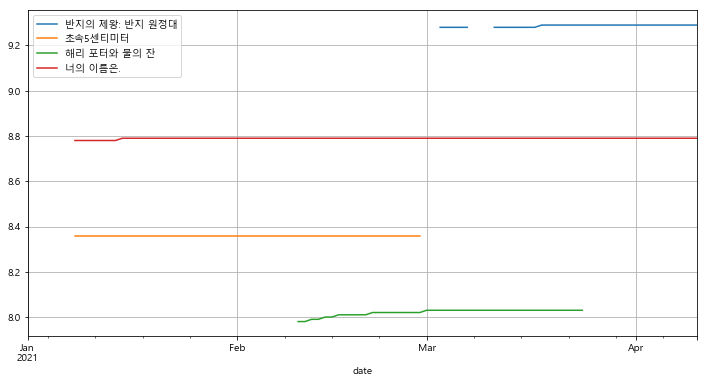

In [82]:
moviePivot.plot(y=['반지의 제왕: 반지 원정대','초속5센티미터','해리 포터와 불의 잔','너의 이름은.'], figsize=(12, 6))
plt.legend(loc='best')
plt.grid()
plt.show()